<a href="https://colab.research.google.com/github/ruttdesai/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# Steps:
#   1. Data Scraping
#   2. Preprocessing
#   3. Splitting the data into Training dataset and Testng Dataset
#   4. Training the model
#   5. Predicting the values
#   6. Checking the accuracy score
#   7. Testing a new image

In [117]:
# To delete a folder along with its contents
#import shutil
#
#dir_path = '/content/images'
#
#try:
#    shutil.rmtree(dir_path)
#except OSError as e:
#    print("Error: %s : %s" % (dir_path, e.strerror))

In [118]:
# Step 1: Data Scraping

!pip install bing-image-downloader # Installing the bing image downloader for bulk downloading
!mkdir images # make a directory called 'images'
from bing_image_downloader import downloader
downloader.download("Parrots",limit=30,output_dir='images') #Search key 1 is "Elephant images"
#Giving the search key to the downloader and setting the limit to 50 images. Giving the destination as 'images folder'

downloader.download("Tigers",limit=30,output_dir='images')  #Search key 2 is "Tiger images"

mkdir: cannot create directory ‘images’: File exists


[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.wallpapers13.com/wp-content/uploads/2016/07/Birds-blue-yellow-parrots-butterfly-tree-with-yellow-flowers-and-green-leaves-beautiful-HD-Desktop-Wallpaper-1600x1200.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.hdwallpapers.in/download/cat_deep_sea_green_eyes_4k_hd-1280x720.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.instructables.com/ORIG/F2N/Z59L/GQB4XT39/F2NZ59LGQB4XT39.jpg?width=500
[%] File Downloaded !

[%] Downloading Image #4 from http://auchterphotography.com/wp-content/uploads/2013/11/Tropical-Birds-4734.jpg
[Error]Invalid image, not saving http://auchterphotography.com/wp-content/uploads/2013/11/Tropical-Birds-4734.jpg

[!] Issue getting: http://auchterphotography.com/wp-content/uploads/2013/11/Tropical-Birds-4734.jpg
[!] Error:: No active exception to reraise
[%] Downloading Im

In [ ]:
# Step 2: Preprocessing
#         1.Resize
#         2.Flattening

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = "/content/images"
CATEGORIES = ['Parrots','Tigers']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  path = os.path.join(DATADIR,category) # Iterating through each category path
  for img in os.listdir(path): #for loop for going into each folder and iterating every image
    img_arr = imread(os.path.join(path,img)) # reading every image
    img_resized = resize(img_arr,(100,100,3)) # resizing every image (It normalizes automatically)
    flat_data.append(img_resized.flatten()) # flattening every image (Converting 2d image into 1d)
    images.append(img_resized) # appending the images into image array
    target.append(class_num)
flat_data = np.array(flat_data) # converting the flattened data array into numpy array
target = np.array(target) # Converting the target data array into numpy array
images = np.array(images) # conveting the images data array into numpy array

In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
# Step 3: Splitting the Data into Training Dataset and Testing Dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=42)

In [122]:
# Step 4: Training the model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {
                'C':[1,10,100,1000],
                'kernel':['linear']
              },
              {
                  'C':[1,10,100,1000],
                  'gamma':[0.001,0.0001],
                  'kernel':['rbf']
              }
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [123]:
# Step 5: Predicting the values
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [124]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [125]:
# Step 6: Checking the accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

1.0

In [126]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0],
       [ 0, 10]])

Enter your image url: https://i.insider.com/4cf65998ccd1d5ae1d130000?width=600&format=jpeg&auto=webp
(300, 400, 3)
PREDICTED OUTPUT: Parrots


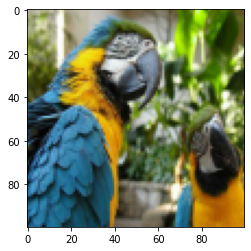

In [127]:
# Step 7: Testing a new image

flat_data = []
url = input("Enter your image url: ")
img = imread(url) 
img_resized = resize(img,(100,100,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = clf.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')